<a href="https://colab.research.google.com/github/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/blob/main/3_2_Identificaci%C3%B3n_de_Patrones%2C_Tendencias_y_Anomal%C3%ADas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **1. Importación de bibliotecas**

In [ ]:
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

## **2. Código para obetner los datos**

In [ ]:
url = "https://raw.githubusercontent.com/GEISSNA/Grupo-3-DAJ10-TRABAJO-FINAL/main/Exploracion/consolidado.csv"
data = pd.read_csv(url)

# Mostrar las primeras filas y resumen general para entender los datos
data.head()

,VentaID,ClienteID,ProductoID,Cantidad,FechaVenta,Region,ProductoID.1,NombreProducto,Categoria,PrecioUnitario,ClienteID.1,NombreCliente,Email,Telefono,Direccion,CategoriasID,NombreCategoria,Venta Total,TransaccionID
0,101,1058,514,6,1/1/2024,Oeste,514,Producto 14,Hogar,36.84,1058,Cliente 58,cliente58@example.com,555-6730,Calle 58 #827,1,Hogar,221.04,1
1,102,1086,509,3,2/1/2024,Sur,509,Producto 9,Juguetería,560.93,1086,Cliente 86,cliente86@example.com,555-1791,Calle 86 #10,2,Jugueteria,1682.79,2
2,103,1060,527,1,3/1/2024,Sur,527,Producto 27,Juguetería,1041.34,1060,Cliente 60,cliente60@example.com,555-6932,Calle 60 #33,2,Jugueteria,1041.34,3
3,104,1024,530,3,4/1/2024,Este,530,Producto 30,Electrónica,582.82,1024,Cliente 24,cliente24@example.com,555-3073,Calle 24 #736,3,Electronica,1748.46,4
4,105,1063,527,6,5/1/2024,Este,527,Producto 27,Juguetería,1041.34,1063,Cliente 63,cliente63@example.com,555-3563,Calle 63 #653,2,Jugueteria,6248.04,5


## **3. Identificación de Patrones, Tendencias y Anomalías**

### **3.1 Código para análisis de series temporales (ventas por mes)**

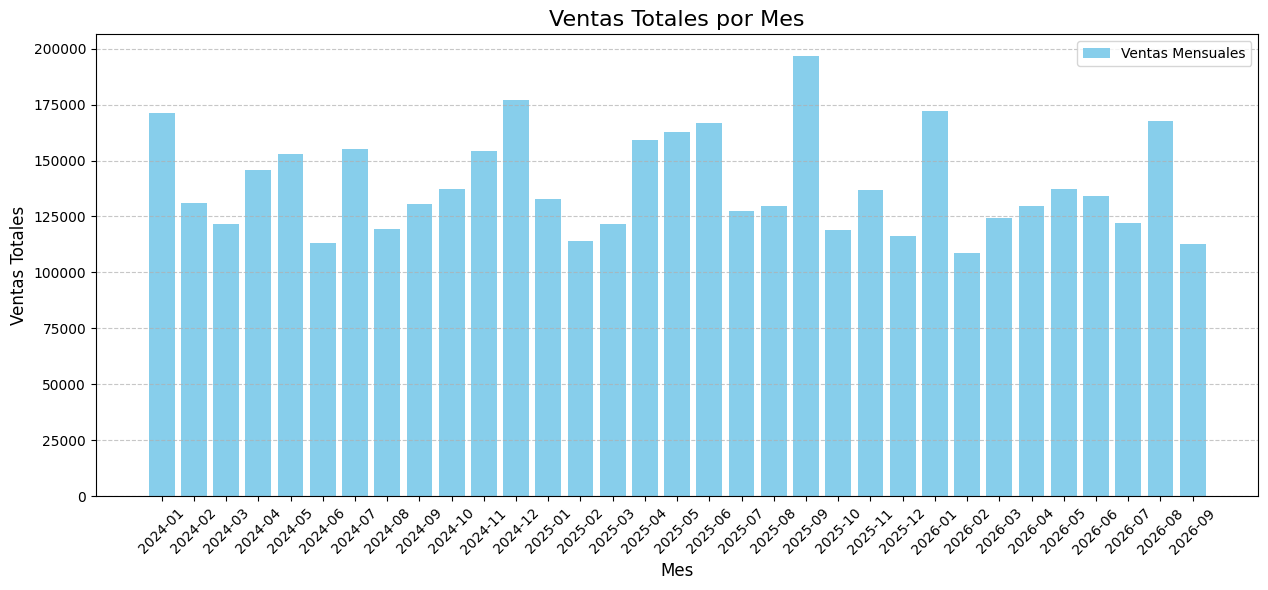

In [ ]:
# Convertir la columna FechaVenta al formato datetime
data['FechaVenta'] = pd.to_datetime(data['FechaVenta'], format='%d/%m/%Y')

# Agregar las ventas por mes
ventas_mensuales = data.groupby(data['FechaVenta'].dt.to_period('M'))['Venta Total'].sum()

# Graficar las ventas mensuales
plt.figure(figsize=(15, 6))
plt.bar(ventas_mensuales.index.astype(str), ventas_mensuales.values, color='skyblue', label='Ventas Mensuales')
plt.title('Ventas Totales por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend()
plt.show()

### **3.1.1 Descomposición aditiva de series temporales (Ventas por mes)**

Esto nos permite entender mejor el comportamiento de los datos a lo largo del tiempo y detectar patrones que pueden ser difíciles de identificar a simple vista.

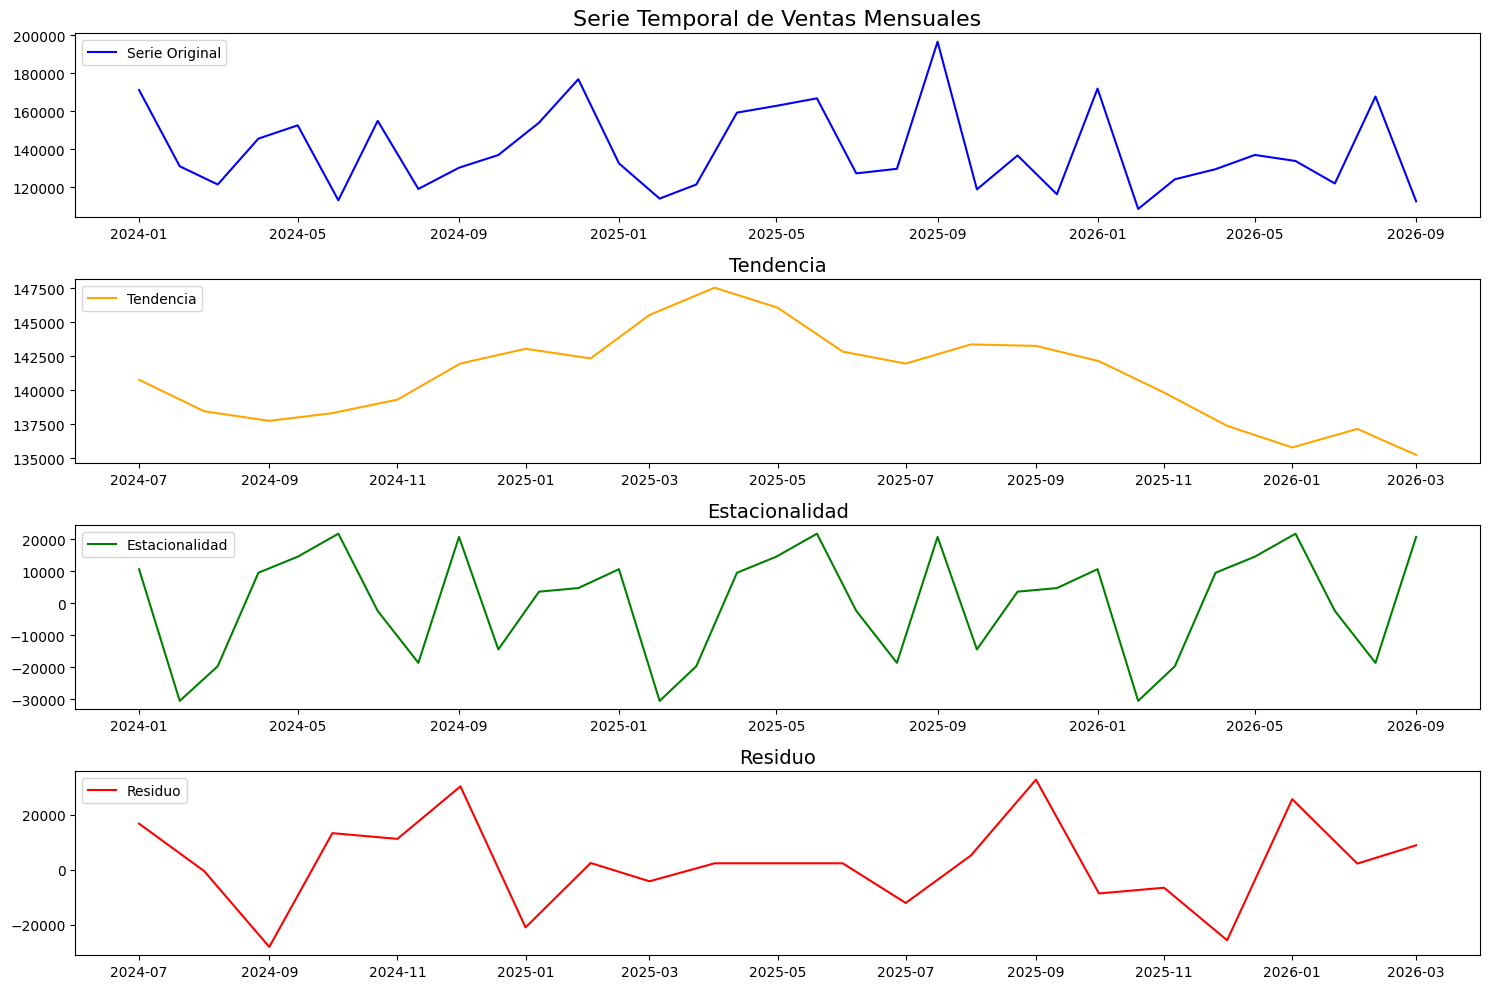

In [ ]:
# Convertir la columna FechaVenta al formato datetime
data['FechaVenta'] = pd.to_datetime(data['FechaVenta'], format='%d/%m/%Y')

# Agregar las ventas por mes
ventas_mensuales = data.groupby(data['FechaVenta'].dt.to_period('M'))['Venta Total'].sum()

# Convertir a serie temporal indexada por fecha
ventas_mensuales.index = ventas_mensuales.index.to_timestamp()

# Descomposición de la serie temporal
descomposición = seasonal_decompose(ventas_mensuales, model='additive', period=12)

# Graficar los componentes
plt.figure(figsize=(15, 10))
plt.subplot(411)
plt.plot(ventas_mensuales, label='Serie Original', color='blue')
plt.title('Serie Temporal de Ventas Mensuales', fontsize=16)
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(descomposición.trend, label='Tendencia', color='orange')
plt.title('Tendencia', fontsize=14)
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(descomposición.seasonal, label='Estacionalidad', color='green')
plt.title('Estacionalidad', fontsize=14)
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(descomposición.resid, label='Residuo', color='red')
plt.title('Residuo', fontsize=14)
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

**EXPLICACIÓN**

* **Calculo de ventas mensuales**: agrupamos por mes y convertimos la columna FechaVenta a índices tipo datetime.

* **Descomposición aditiva**: la descomposición separa la serie en tendencia, estacionalidad y residuo. Es útil para identificar patrones subyacentes.

* **Visualización**: los cuatro gráficos muestran la serie original, tendencia, estacionalidad y residuo, permitiendo análisis visual.


---
**A. Tendencia**

La tendencia representa el comportamiento de largo plazo de la serie temporal. Refleja si, en promedio, las ventas están creciendo, decreciendo o permanecen constantes a lo largo del tiempo.

- Interpretación: Si la tendencia es ascendente, puede indicar un crecimiento en las ventas a lo largo de los meses o años. Si es descendente, podría sugerir una disminución en las ventas.
- **Ejemplo**: Si las ventas aumentan cada mes debido a factores como el crecimiento de la marca o la mejora del mercado, la tendencia será positiva.

**B. Estacionalidad**

La estacionalidad captura patrones repetitivos o ciclos que ocurren en intervalos regulares, como cada año, cada trimestre, o incluso cada mes. Esta componente es muy común en las series temporales de ventas debido a factores como:

- **Eventos regulares**: como descuentos estacionales (Black Friday, Navidad, etc.), vacaciones o temporadas altas de consumo (como el verano).

- **Factores climáticos o de calendario**: por ejemplo, ventas más altas en invierno si se venden productos de calefacción.

- **Interpretación**: La estacionalidad muestra cómo las ventas pueden aumentar o disminuir en ciertos períodos debido a estos ciclos. Si, por ejemplo, las ventas se incrementan durante diciembre debido a las festividades, esta variación aparecerá en el componente estacional.

**C. Residuo**

Es el "ruido" o variabilidad aleatoria en los datos que no sigue un patrón específico. Los residuos incluyen:

- **Errores aleatorios**: Cambios inesperados que no pueden predecirse fácilmente.

- **Eventos inesperados**: Factores como crisis económicas, problemas logísticos o eventos inesperados que afectan las ventas.

- **Interpretación**: Los residuos deben ser aleatorios y no tener patrones evidentes. Si muestran un patrón, es posible que haya otros factores no capturados por la tendencia o estacionalidad que están afectando las ventas.



---
**Visualización de los Componentes**

Al descomponer la serie en estas tres partes, podemos visualizar cómo cada uno contribuye al comportamiento total de las ventas. Si observamos las gráficas:

- **Serie Original**: Esta es la serie temporal de ventas mensuales. Es la combinación de todos los componentes (tendencia, estacionalidad y residuo).

- **Tendencia**: Nos muestra la dirección general del comportamiento de las ventas a largo plazo.

- **Estacionalidad**: Muestra los picos y valles repetitivos que ocurren a intervalos regulares (por ejemplo, cada año, o cada mes si es un patrón mensual).

- **Residuo**: Muestra las fluctuaciones impredecibles que no pueden explicarse por la tendencia ni la estacionalidad. Si los residuos son grandes o siguen un patrón, puede que haya más factores que necesitamos analizar.



---
**Análisis Interpretativo**

Con base en la descomposición, podemos hacer un análisis más detallado de las ventas:

- **Tendencia positiva**: Si la tendencia muestra un crecimiento sostenido, podríamos concluir que las ventas están aumentando debido a factores a largo plazo, como la mejora del producto o la expansión del mercado.

- **Estacionalidad**: Si los picos coinciden con eventos específicos (como un aumento en las ventas en diciembre debido a Navidad), podemos planificar futuras estrategias de marketing para aprovechar esos períodos.

- **Residuo aleatorio**: Si los residuos son grandes o tienen patrones, podemos investigar si hay eventos imprevistos (por ejemplo, crisis, desastres naturales) que han afectado las ventas.



### **3.2 Código para clasificar clientes según frecuencia de compra**

Agruparemos los datos por cliente, calculando las siguientes métricas:

* **Frecuencia**: Número de transacciones.
* **Recencia**: Días desde la última compra (basado en la fecha máxima).
* **Monetización**: Suma total de ventas.

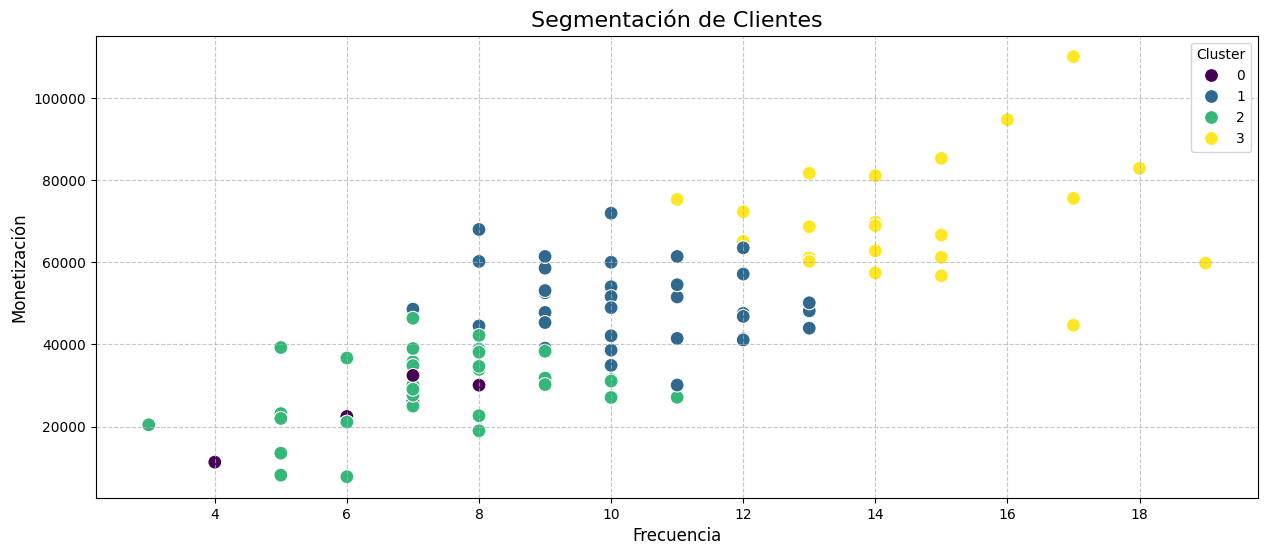

In [ ]:
# Segmentación de Clientes: Gasto Total por Cliente
# Calcular el gasto total por cliente
gasto_por_cliente = data.groupby('ClienteID')['Venta Total'].sum().sort_values(ascending=False)

# Visualizar los datos principales
gasto_por_cliente.head(), gasto_por_cliente.describe()

# 1. Calcular las métricas por cliente
recencia = (data['FechaVenta'].max() - data.groupby('ClienteID')['FechaVenta'].max()).dt.days
frecuencia = data.groupby('ClienteID')['VentaID'].count()
monetizacion = data.groupby('ClienteID')['Venta Total'].sum()

# Crear un DataFrame para el agrupamiento
df_clientes = pd.DataFrame({
    'Recencia': recencia,
    'Frecuencia': frecuencia,
    'Monetizacion': monetizacion
})

# 2. Escalado de datos
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clientes)

# 3. Aplicar K-means
kmeans = KMeans(n_clusters=4, random_state=42)
df_clientes['Cluster'] = kmeans.fit_predict(df_scaled)

# 4. Visualizar los resultados
plt.figure(figsize=(15, 6))
sns.scatterplot(
    x='Frecuencia', y='Monetizacion', hue='Cluster', data=df_clientes,
    palette='viridis', s=100
)
plt.title('Segmentación de Clientes', fontsize=16)
plt.xlabel('Frecuencia', fontsize=12)
plt.ylabel('Monetización', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Cluster')
plt.show()

**ANALISIS**

**Variables utilizadas para el análisis**

Se seleccionaron tres métricas clave para describir el comportamiento del cliente:

* **Recencia**: Define cuántos días han pasado desde la última compra del cliente. Clientes con menor recencia suelen ser más activos y valiosos.
* **Frecuencia**: Mide cuántas transacciones realizó el cliente. Clientes frecuentes tienden a ser leales y generan ingresos recurrentes.
* **Monetización**: Representa el gasto total del cliente. Clientes con altos valores son prioritarios para estrategias de retención o ventas cruzadas.


---
**Interpretación de los clusters**

Los resultados dividen a los clientes en segmentos clave:

* **Cluster 3** (Clientes Premium): Alta frecuencia, baja recencia, y alta monetización. Estos clientes son los más valiosos y leales.

* **Cluster 2** (Clientes Dormidos): Alta recencia, baja frecuencia, y baja monetización. Necesitan estrategias de reactivación.

* **Cluster 1** (Clientes Nuevos): Baja recencia, baja frecuencia, pero moderada monetización. Representan oportunidades para convertirlos en clientes leales.

* **Cluster 0** (Clientes de Bajo Valor): Alta recencia, baja frecuencia, y baja monetización. Podrían no ser prioritarios, pero tienen potencial en ciertos casos.

---
**Visualización de resultados**

La gráfica de dispersión de Frecuencia vs. Monetización muestra cómo se agrupan los clientes:

* Cada punto representa un cliente.
* El color indica el cluster asignado.
* Los clusters ayudan a visualizar diferencias claras entre grupos (por ejemplo, clientes que gastan mucho pero compran poco vs. clientes frecuentes con gasto moderado).



### **3.3 Código para identificar picos de ventas**

**A.** Anomalías en ventas diarias (picos inusuales)

* Usar el total de ventas por día.
* Aplicar un análisis estadístico o métodos de detección de valores atípicos, como:

  ✔ Regla de los 1.5 * IQR (Rango Intercuartil).

  ✔ Detección basada en desviación estándar.

* Visualizar los picos en una gráfica de serie temporal

---
**B.** Productos con ventas inesperadas

* Calcular las ventas totales por producto.
* Comparar contra el promedio y la desviación estándar para detectar productos con:

  ✔ Ventas extraordinariamente altas.

  ✔ Ventas mucho más bajas de lo esperado.

---
**C.** Clientes con comportamientos atípicos

* Analizar el gasto total por cliente y el número de transacciones.
* Detectar clientes que:

  ✔ Gastan significativamente más o menos que la mayoría.

  ✔ Compran con frecuencia inusual.

**A. Detección de picos de ventas mensuales**

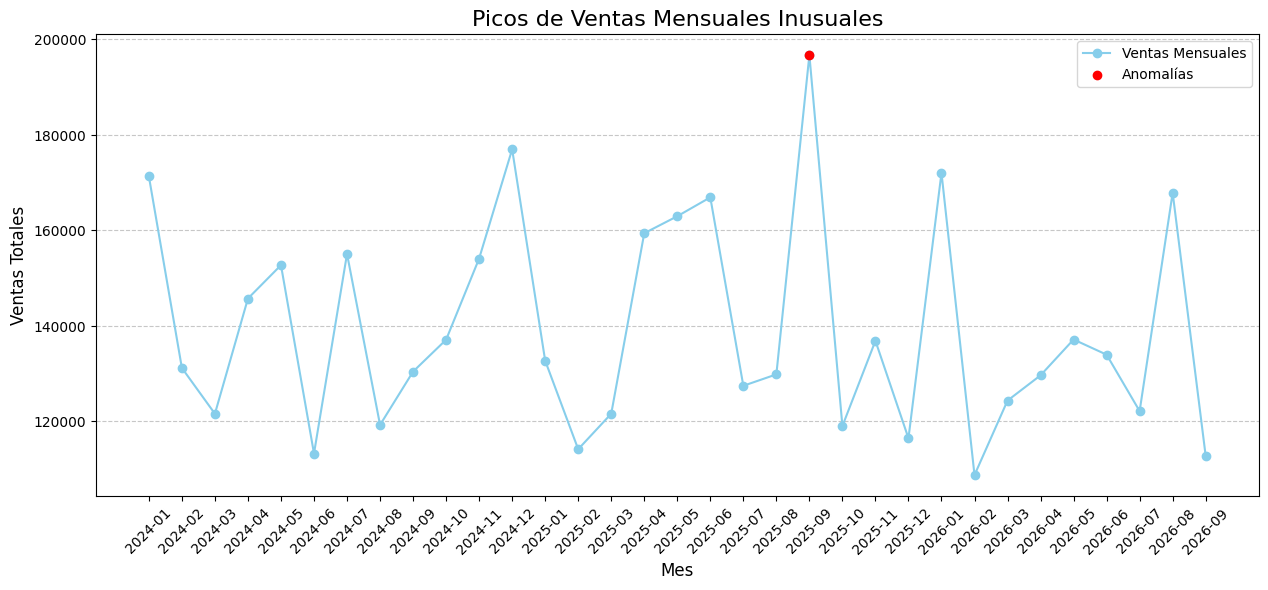

In [ ]:
# Calcular ventas mensuales
ventas_mensuales = data.groupby(data['FechaVenta'].dt.to_period('M'))['Venta Total'].sum()

# Calcular estadísticas básicas
mean_ventas = ventas_mensuales.mean()
std_ventas = ventas_mensuales.std()

# Identificar meses con ventas inusuales (mayores a 2 desviaciones estándar)
anomalías_ventas = ventas_mensuales[ventas_mensuales > mean_ventas + 2 * std_ventas]

# Gráfica de ventas mensuales con anomalías
plt.figure(figsize=(15, 6))
plt.plot(ventas_mensuales.index.astype(str), ventas_mensuales.values, marker='o', linestyle='-', color='skyblue', label='Ventas Mensuales')
plt.scatter(anomalías_ventas.index.astype(str), anomalías_ventas.values, color='red', label='Anomalías', zorder=5)
plt.title('Picos de Ventas Mensuales Inusuales', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Ventas Totales', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**ANALISIS**

Un mes es considerado inusual si sus ventas totales superan 2 desviaciones estándar por encima del promedio.

**B. Productos con ventas inesperadas**

In [ ]:
# Calcular ventas por producto
ventas_por_producto = data.groupby('NombreProducto')['Venta Total'].sum()
mean_producto = ventas_por_producto.mean()
std_producto = ventas_por_producto.std()

# Detectar productos atípicos
productos_altas = ventas_por_producto[ventas_por_producto > mean_producto + 2 * std_producto]
productos_bajas = ventas_por_producto[ventas_por_producto < mean_producto - 2 * std_producto]

# Mostrar resultados
print("Productos con ventas extraordinarias altas:")
print(productos_altas)
print("\nProductos con ventas significativamente bajas:")
print(productos_bajas)

Productos con ventas extraordinarias altas:
NombreProducto
Producto 15    377208.51
Name: Venta Total, dtype: float64

Productos con ventas significativamente bajas:
Series([], Name: Venta Total, dtype: float64)


**C. Clientes con comportamientos fuera de lo común**

In [ ]:
# Calcular gasto total por cliente
gasto_por_cliente = data.groupby('ClienteID')['Venta Total'].sum()
mean_cliente = gasto_por_cliente.mean()
std_cliente = gasto_por_cliente.std()

# Detectar clientes extremos
clientes_altos = gasto_por_cliente[gasto_por_cliente > mean_cliente + 2 * std_cliente]
clientes_bajos = gasto_por_cliente[gasto_por_cliente < mean_cliente - 2 * std_cliente]

# Mostrar resultados
print("Clientes con gasto extraordinario:")
print(clientes_altos)
print("\nClientes con gasto muy bajo:")
print(clientes_bajos)

Clientes con gasto extraordinario:
ClienteID
1043    110127.57
1063     94780.25
Name: Venta Total, dtype: float64

Clientes con gasto muy bajo:
Series([], Name: Venta Total, dtype: float64)


**ANALISIS**

* Picos en ventas: Identificar días con eventos promocionales, festividades o errores en el registro.

* Productos atípicos: Revisar el inventario para productos con ventas altas inesperadas. Evaluar estrategias de marketing para productos con bajas ventas.

* Clientes fuera de lo común: Premiar a clientes con alto gasto y reactivar clientes con bajo gasto.